# Homework 1: Perceptrons
### Due Thursday, January 17, 2019, 5pm
#### Jesse Zhu
#### ML-W2019

Using the MNIST hand-written digits dataset, we aim to use perceptrons to categorize the labeled data through supervised learning. As this is a single-layer, the result is not expected to be perfect, but should be noticeably better than random. Each data point will be 785 values between 0 and 1, representing the grayscale value of each pixel in the original image. These values will be used to update our weight values over the course of 50 epochs, resulting in our 10 perceptrons (digits 0 to 9) being trained at the end. Finally, we will run test data through these trained perceptrons and take the maximum value of the 10 perceptrons as the predicted result.

In [70]:
#import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [30]:
#IMPORT DATA#################
testfile = "mnist_test.csv"
trainfile = "mnist_train.csv"

# test_data = pd.read_csv(testfile)
# train_data = pd.read_csv(trainfile)

#Data is 785 columns by N rows. First column = Label (0-9), others = 0:255
test_data = np.genfromtxt(testfile, skip_header=True, delimiter=',')
train_data = np.genfromtxt(trainfile, skip_header=True, delimiter=',')

#PREPROCESSING###############

#SCALE by 255
test_data[:,1:] /= 255
train_data[:,1:] /= 255
#print((test_data[0,:]))

In [218]:
#Accuraccy function
def acc(weights, data, debug = 0):
    """
    input: 
        weights: matrix of 785 weights by 10 classes, where the first weight is the bias
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
    output: Percentage of correct classifications, where a classification is taken using the highest perceptron
        output value
    """
    length = len(data[:,0])
    xi = np.append(np.ones([length,1]), data[:, 1:],1)
    out = xi @ weights[:, :]
    amax = out.argmax(axis=1)
    if debug:
        print(out.shape)
        print(amax[0:25])
    ret = np.sum(amax == data[:,0])
    return ret/length

#Confusion matrix
def cm(weights, data):
    length = len(data[:,0])
    xi = np.append(np.ones([length,1]), data[:, 1:],1)
    m = np.zeros([11,11])
    m[0,1:] = np.arange(10)
    m[1:,0] = np.arange(10)
    
    for i in range(0, length):
        actual = int(data[i, 0])
        predic = int((xi[i,:] @ weights).argmax(axis=0))
        m[actual+1, predic+1] += 1
        
    return m.astype(int)

#Drawing function
def draw_digit(data):
    """
    input:
        1x785 matrix of grayscaled pixel values
    output: image of (1:785 pixels, skipping first label)
    """
    img = np.reshape(data[1:], (28, 28))
    print(img)
    plt.imshow(img)
    plt.show
    
#Training function
def train(weights, data, lr, debug = 0):
    """
    input: 
        weights: matrix of 785 weights by 10 classes, where the first weight is the bias
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
        lr: learning rate (~ 0 to 1)
    output:
        Altered input weights matrix
    """
    length = len(data[:,0])

    for i in range(0,length):
        xi = np.append([1], data[i, 1:]) #add "1" to input beginning for offset -> 1x785
        out = np.add((data[i, 1:] @ weights[1:, :]), weights[0, :]) #1 by 10 matrix

        target = np.zeros(10)
        tindex = int(data[i,0])
        target[tindex] = 1 #1x10 of 0s, with target index = 1
      
        out[out < 0] = 0
        out[out > 0] = 1
        if i == 0 and debug:
            print(target-out)

        deltaw = lr * np.outer(xi,(target - out)) #785x1 * 1x10 = 785x10
        if i == 0 and debug:
            print(deltaw[0:10,0:5])
            print(xi[0:10])
            print(deltaw.sum())
            print(weights.sum())

        weights += deltaw
        if i == 0 and debug:
            print(weights.sum())
    
    return

In [224]:
init_weights = (np.random.rand(785,10) * 0.10) - 0.05
learning_rates = [0.01, 0.1, 1.0]

***RATE =  0.01 ***************
012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849 
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  953    0    4    1    0    5   10    2    4    1]
 [   1    0 1110    3    2    3    1    3    1   12    0]
 [   2    9   40  806   86   11    9   14    8   43    6]
 [   3    6    3   15  927    0   22    5   11   11   10]
 [   4    1    3    7    3  819    0   19    3   13  114]
 [   5   12    3    1   89    8  666   44    8   37   24]
 [   6    7    5    4    1    2   25  905    1    8    0]
 [   7    3   13   19   12   15    2    1  905    8   49]
 [   8   12   31   13  109   23   15   28    5  690   48]
 [   9    7    6    3   19   13    3    3   16    8  931]]
final test acc =  0.8712871287128713
final train acc =  0.8805646760779346


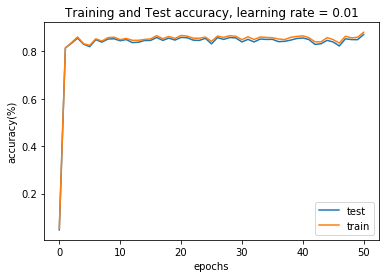

***RATE =  0.1 ***************
012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849 
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  952    0    2    5    0    5    7    3    5    1]
 [   1    0 1112    0    7    0    1    3    1   10    1]
 [   2    6   32  724  189    4    6   19    6   41    5]
 [   3    2    2    6  966    1    8    2    5    8   10]
 [   4    2    1    5    6  781    1   23    1   14  148]
 [   5   12    3    3  117   10  641   33    7   47   19]
 [   6    7    5    1    3    3   19  914    0    5    1]
 [   7    5   13   18   32   10    0    2  838   16   93]
 [   8    6   20    6  193   17   12   24    3  653   40]
 [   9    6    7    2   26   13    3    2    7    5  938]]
final test acc =  0.851985198519852
final train acc =  0.8612976882948049


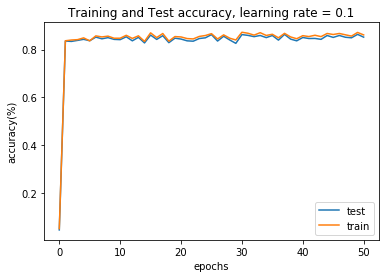

***RATE =  1.0 ***************
012345678910111213141516171819202122232425262728293031323334353637383940414243444546474849 
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  949    0    2    4    1    3   13    2    4    2]
 [   1    0 1122    1    4    0    1    3    1    3    0]
 [   2    8   44  789  128    5    7   14    7   23    7]
 [   3    5    3   11  946    1    7    4    9    6   18]
 [   4    1    2   11    3  782    0   15    1    8  159]
 [   5    9    2    5  127   15  609   37    6   46   36]
 [   6    5    5    3    2    2   19  919    1    2    0]
 [   7    3   10   30   18   16    3    2  849    4   92]
 [   8    7   48   12  126   20   15   25    4  647   70]
 [   9    6    6    7   18   13    5    2    9    4  939]]
final test acc =  0.8551855185518552
final train acc =  0.862664377739629


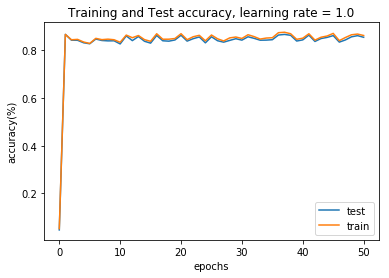

In [227]:
#draw_digit(test_data[0, :])
epochs = 50
for rate in learning_rates:
    print("***RATE = ",rate,"***************")
    w = np.copy(init_weights)
    acc_test = []
    acc_train = []

    acc_test.append(acc(w, test_data))
    acc_train.append(acc(w, train_data))

    for i in range(0,epochs):
        train(w, train_data, rate)
        acc_test.append(acc(w, test_data))
        acc_train.append(acc(w, train_data))
        print(i, end='', flush=True)
    print(" ") #newline

    print(cm(w, test_data))
    print("final test acc = ", acc_test[len(acc_test)-1])
    print("final train acc = ", acc_train[len(acc_train)-1])

    plt.plot(acc_test)
    plt.plot(acc_train)
    plt.xlabel("epochs")
    plt.ylabel("accuracy(%)")
    title = "Training and Test accuracy, learning rate = " + str(rate)
    plt.title(title)
    plt.legend(("test", "train"),loc='lower right')
    plt.show()

## Discussion

#### LR = 0.01:
Very few mistakes for '0', '1' (~20/1000 errors), which is expected as those digits are some of the simplest shapes. I did expect some confusion between '1's and '7s, but that does not appear to be the case.
'2' was mistaken a moderate amount (~175/1000 errors), split between 1, 3, and 8s.
'3' was very accurate (~20/1000 errors), which is unexpected considering 2 had so much trouble, and they are both curvy numbers. It's possible 2 is more complex because it combines both a curve and a straight line at the bottom.
'4' was moderately accurate, with the vast majority of erroneous predictions being '9', making perfect sense as those two digits look similar, and are probably the most mistaken digits for humans as well.
'5' was moderately accurate, with mistakes concentrated mostly at '3', and a few at 6,8, and 9 as well.
'6' was very accurate.
'7' was very accurate, with the exception of ~50 errors attributed to 9.
'8' was the least accurate of all the digits (~300/1000 errors), with half the errors attributed to 3. 1 and 9 were also attributed.
'9' was decently accurate (~50/1000 errors), considering the trouble other numbers had in being mistaken for 9.

#### LR = 0.1:
The same trends in mistakes continue, though with noticeably higher errors present in the confusion matrix. For example, '8' was mistaken for '3' 109 times in the 0.01 rate, but that number jumped to ~190 in the 0.1 rate.

#### LR = 1:
'6' is most often classified incorrectly, and is often mistaken as '4'.

#### Overall:

There was no overfitting, as training and test rates are very close, with training data slighty higher (~1%), as expected given the network has seen them before. There is no noticeable difference in accuraccy between the training rates, as all 3 graphs show a jump to ~85% after a single epoch, and minor fluctuations afterwards. The smallest training rate, 0.01, gave the best result at 87% test accuraccy, while the 0.1 and 1.0 rates were very close at ~85%.

Finally, it is interesting to note the mistakes don't appear to go both ways. 4s are mistaken for 9s a good deal, but 9s are not mistaken for 4s.


### Appendix of Resources
1. Matrix multiplication
https://stackoverflow.com/questions/21562986/numpy-matrix-vector-multiplication

```python
a = np.random.rand(1,3)
b = np.random.rand(3,5)
print(a@b)

print(np.zeros([3,3]))

np.add([1, 2, 3], [5, 5, 0])
```

2. Argmax arrays
https://stackoverflow.com/questions/5469286/how-to-get-the-index-of-a-maximum-element-in-a-numpy-array-along-one-axis
```python
mm.argmax(axis=1)
```

3. Plotting 2d arrays
https://stackoverflow.com/questions/16492830/colorplot-of-2d-array-matplotlib

4. Count # Equal Array Elements
https://stackoverflow.com/questions/25490641/check-how-many-elements-are-equal-in-two-numpy-arrays-python
```python
np.sum(a == b)
```

5. Multiplying 1-D arrays / transposing
https://stackoverflow.com/questions/23566515/multiplication-of-1d-arrays-in-numpy
```python
b[:, None]
```

6. Positive/Negative values -> 1, 0
https://stackoverflow.com/questions/10335090/numpy-replace-negative-values-in-array

```python
f = np.array([-2, -1, 0, 0, 3, 5, -4])
f[f < 0] = 0
f[f > 0] = 1
```

7. Python numpy references vs call by reference?
https://stackoverflow.com/questions/11585793/are-numpy-arrays-passed-by-reference/11585888
`weights = np.add(weights, deltaw) #DOES NOT WORK`

`weights += blah` works

In [133]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = [10, 11, 12]
a[1,:] = np.add(a[1,:], b)
print(2*a)
print(7-a)
c = np.array([0.1, 0.2, 0.3, -0.4, -0.5, -0.6])
print(np.ceil(c))
d = np.array([[1, 2, 3, 4, 5]])
e = np.array([[0, 0, 1]])
print(np.transpose(d)@e)
f = np.array([-2, -1, 0, 0, 3, 5, -4])
f[f < 0] = 0
f[f > 0] = 1
print(f)
g = np.zeros(5)
g[4] = 1
print(g)
a1 = [1, 2, 3, 4, 5]
b1 = [10, 10, 10]
print(np.outer(a1,b1))

[[ 2  4  6]
 [28 32 36]]
[[  6   5   4]
 [ -7  -9 -11]]
[ 1.  1.  1. -0. -0. -0.]
[[0 0 1]
 [0 0 2]
 [0 0 3]
 [0 0 4]
 [0 0 5]]
[0 0 0 0 1 1 0]
[0. 0. 0. 0. 1.]
[[10 10 10]
 [20 20 20]
 [30 30 30]
 [40 40 40]
 [50 50 50]]


In [202]:
c1 = np.array([[1, 2, 3],[1,2,3]])
d1 = np.ones([2,1])
print(d1)
e1 = np.append(d1, c1, 1)
print(e1)

[[1.]
 [1.]]
[[1. 1. 2. 3.]
 [1. 1. 2. 3.]]
